### PEQUENO TESTE 06

Neste teste, vamos resolver um problema de otimização com restrições usando
o Método do Lagrangeano Aumentado. O problema é dado por:

        min f(x) = (x1^2)^(x2^2 + 1) + (x2^2)^(x1^2 + 1)
            s.a.
                g(x) = -(x1-1)^3 - x2 + 1 <= 0
                h(x) = (x1-2.2)^2 - x2 - 1 = 0

Neste teste, o seu objetivo é implementar a versão modificada da
função-objetivo na linha 57 e a atualização dos multiplicadores de Lagrange
nas linhas 72 e 73.

Iteração 1 - x-ótimo: [0.75771798 0.62817998], lambda = 0.00, mu = 0.00, u = 1.00
Iteração 2 - x-ótimo: [0.83203835 0.73605912], lambda = 0.45, mu = 0.39, u = 1.20
Iteração 3 - x-ótimo: [0.84528441 0.79799592], lambda = 0.61, mu = 0.71, u = 1.44
Iteração 4 - x-ótimo: [0.84033246 0.84548609], lambda = 0.67, mu = 1.00, u = 1.73
Iteração 5 - x-ótimo: [0.82955612 0.88507229], lambda = 0.67, mu = 1.28, u = 2.07
Iteração 6 - x-ótimo: [0.81790214 0.91843256], lambda = 0.66, mu = 1.53, u = 2.49
Iteração 7 - x-ótimo: [0.80744833 0.94589718], lambda = 0.64, mu = 1.75, u = 2.99
Iteração 8 - x-ótimo: [0.79897335 0.96754823], lambda = 0.62, mu = 1.93, u = 3.58
Iteração 9 - x-ótimo: [0.79262282 0.98366349], lambda = 0.60, mu = 2.07, u = 4.30
Iteração 10 - x-ótimo: [0.78821205 0.99486053], lambda = 0.59, mu = 2.18, u = 5.16


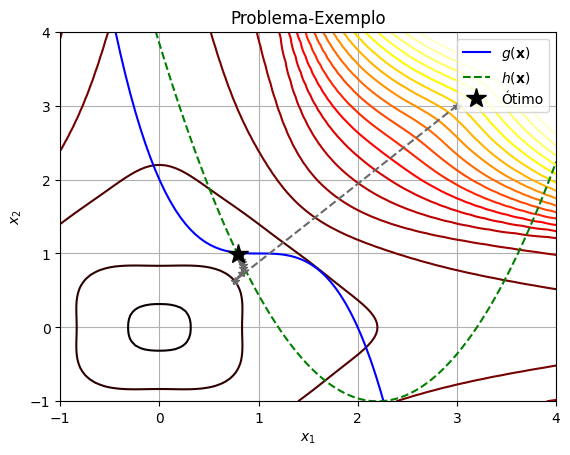

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy import optimize

# Definição da função-objetivo
def f(x):
    x1, x2 = x
    return (x1**2)**(x2**2 + 1) + (x2**2)**(x1**2 + 1)

# Definição da restrição de desigualdade
def g(x):
    x1, x2 = x
    return -(x1-1)**3 - x2 + 1

# Definição da restrição de igualdade
def h(x):
    x1, x2 = x
    return (x1-2.2)**2 - x2 - 1

# Parâmetros iniciais
x = np.array([3, 3], dtype=float) # Ponto inicial
mu = 0. # Multiplicador de Lagrange (desigualdade) p/ g1
lam = 0. # Multiplicador de Lagrange (igualdade) p/ h1
u = 1. # Constante de penalidade
alpha = 1.2 # Aceleração da penalização
k = 1 # Contador de iterações
precisao = 1e-2
historia = [x] # Histórico das variáveis de decisão
xanterior = x.copy() # Valor anterior da variável de decisão

# Processo iterativo
while True:
    
    # Definição da função Lagrangeana Aumentada que será a
    # função-objetivo do problema transformado
    def LA(x):
        fx = f(x)
        hx = h(x)
        gx = g(x)
        return fx + lam * hx + (u/2)*hx**2 + mu * max(0, gx) + (u/2)*max(0, gx) ** 2
    
    # Resolve problema de otimização irrestrito
    solution = optimize.minimize(LA, x, method='BFGS')
    
    # Atualização da variável de decisão
    x = solution.x
    
    print('Iteração %d' % k, end=' - ')
    print('x-ótimo: ' + str(x), end=', ')
    print('lambda = %.2f' % lam, end=', ')
    print('mu = %.2f' % mu, end=', ')
    print('u = %.2f' % u)
    
    # Atualização dos multiplicadores de Lagrange
    mu = max(0, mu + u * g(x))
    lam = lam + u * h(x)

    # Atualização da constante de penalização
    u = alpha*u

    # Atualização das iterações
    k += 1
    
    # Salva informação do novo ponto encontrado
    historia.append(x)
    
    # Verifica critério de parada
    if np.linalg.norm(x-xanterior)/np.linalg.norm(x) < precisao:
        break
    else:
        xanterior = x.copy()

"""           Visualização da trajetória do algoritmo                """

# Limites das variáveis de decisão
x1lim = (-1, 4)
x2lim = (-1, 4)
x1, x2 = np.meshgrid(np.linspace(*x1lim, 100),
                     np.linspace(*x2lim, 100))

# Calcula o valor da função-objetivo em cada ponto
fx = np.zeros_like(x1)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        fx[i,j] = f([x1[i,j], x2[i,j]])

# Exibe as curvas de nível da função-objetivo
plt.figure()
levels = np.logspace(-1, 15, 20)  # Usando escala logarítmica para níveis
plt.contour(x1, x2, fx, levels=levels, norm=LogNorm(), cmap='hot')

# Exibe a restrição de desigualdade	
x1 = np.linspace(-1, 4, 100)
x2 = -(x1-1)**3 + 1
plt.plot(x1, x2, 'b-', label=r'$g(\mathbf{x})$')

# Exibe a restrição de igualdade
x2 = (x1-2.2)**2 - 1
plt.plot(x1, x2, 'g--', label=r'$h(\mathbf{x})$')

# Exibe a trajetória do algoritmo
history = np.array(historia)
plt.plot(history[:, 0], history[:, 1], '*--', color='dimgray')

# Marca a solução ótima do problema
plt.plot(x[0], x[1], '*k', label='Ótimo', markersize=15)
plt.legend()

# Configurações adicionais
plt.xlim(*x1lim)
plt.ylim(*x2lim)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.legend()
plt.grid()
plt.show()

Completando a função lagrangeana aumentada:foi utilizada:

fx: função original

+ λ * h(x) + (u/2) * h(x)^2: penaliza violação da igualdade

+ μ * max(0, g(x)) + (u/2) * max(0, g(x))^2: penaliza violação da desigualdade apenas se g(x) > 0

E atualizando os multiplicadores:
mu = max(0, mu + u * g(x))
lam = lam + u * h(x)

É visível a aproximação da região viável, respeitando g(x) ≤ 0 e h(x) = 0 enquanto busca o mínimo de f(x).

O multiplicador vai se ajustando conforme h(x) tende a 0 enquanto a cada iteração o u (penalidade) cresce e o algortimo força fortemente o cumprimento das restrições.